In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
afc1970 = pd.read_html('/content/gdrive/MyDrive/SuperBowl2022/superbowl_data/1970/afc.xls')
nfc1970 = pd.read_html('/content/gdrive/MyDrive/SuperBowl2022/superbowl_data/1970/nfc.xls')
playoffs1970 = pd.read_html('/content/gdrive/MyDrive/SuperBowl2022/superbowl_data/1970/playoffs.xls')
regular1970 = pd.read_html('/content/gdrive/MyDrive/SuperBowl2022/superbowl_data/1970/regular.xls')

In [ ]:
afc1970 = afc1970[0]
nfc1970 = nfc1970[0]
playoffs1970 = playoffs1970[0]
seasongames1970 = regular1970[0]
afc1970['Tm'] = afc1970['Tm'].str.replace('*', '')
afc1970['Tm'] = afc1970['Tm'].str.replace('+', '')
nfc1970['Tm'] = nfc1970['Tm'].str.replace('*', '')
nfc1970['Tm'] = nfc1970['Tm'].str.replace('+', '')
reg1970 = pd.concat([afc1970,nfc1970])
x1 = pd.merge(reg1970, seasongames1970, left_on='Tm',right_on='Winner/tie')
y1 = pd.merge(reg1970,seasongames1970, left_on='Tm',right_on = 'Loser/tie')
z1 = pd.merge(x1, y1, left_on = 'Loser/tie',right_on = 'Loser/tie')
z1

,Tm_x,W_x,L_x,T_x,W-L%_x,PF_x,PA_x,PD_x,MoV_x,SoS_x,SRS_x,OSRS_x,DSRS_x,Week_x,Day_x,Date_x,Time_x,Winner/tie_x,Unnamed: 5_x,Loser/tie,Unnamed: 7_x,PtsW_x,PtsL_x,YdsW_x,TOW_x,YdsL_x,TOL_x,Tm_y,W_y,L_y,T_y,W-L%_y,PF_y,PA_y,PD_y,MoV_y,SoS_y,SRS_y,OSRS_y,DSRS_y,Week_y,Day_y,Date_y,Time_y,Winner/tie_y,Unnamed: 5_y,Unnamed: 7_y,PtsW_y,PtsL_y,YdsW_y,TOW_y,YdsL_y,TOL_y
0,Baltimore Colts,11,2,1,0.846,321,234,87,6.2,-5.8,0.4,0.9,-0.5,1,Sun,1970-09-20,4:00PM,Baltimore Colts,@,San Diego Chargers,boxscore,16.0,14.0,303.0,3.0,288.0,1.0,San Diego Chargers,5,6,3,0.455,282,278,4,0.3,-1.0,-0.7,0.5,-1.2,1,Sun,1970-09-20,4:00PM,Baltimore Colts,@,boxscore,16.0,14.0,303.0,3.0,288.0,1.0
1,Baltimore Colts,11,2,1,0.846,321,234,87,6.2,-5.8,0.4,0.9,-0.5,1,Sun,1970-09-20,4:00PM,Baltimore Colts,@,San Diego Chargers,boxscore,16.0,14.0,303.0,3.0,288.0,1.0,San Diego Chargers,5,6,3,0.455,282,278,4,0.3,-1.0,-0.7,0.5,-1.2,3,Sun,1970-10-04,4:00PM,Los Angeles Rams,NaN,boxscore,37.0,10.0,277.0,1.0,147.0,4.0
2,Baltimore Colts,11,2,1,0.846,321,234,87,6.2,-5.8,0.4,0.9,-0.5,1,Sun,1970-09-20,4:00PM,Baltimore Colts,@,San Diego Chargers,boxscore,16.0,14.0,303.0,3.0,288.0,1.0,San Diego Chargers,5,6,3,0.455,282,278,4,0.3,-1.0,-0.7,0.5,-1.2,4,Mon,1970-10-12,9:00PM,Green Bay Packers,@,boxscore,22.0,20.0,341.0,2.0,257.0,5.0
3,Baltimore Colts,11,2,1,0.846,321,234,87,6.2,-5.8,0.4,0.9,-0.5,1,Sun,1970-09-20,4:00PM,Baltimore Colts,@,San Diego Chargers,boxscore,16.0,14.0,303.0,3.0,288.0,1.0,San Diego Chargers,5,6,3,0.455,282,278,4,0.3,-1.0,-0.7,0.5,-1.2,10,Sun,1970-11-22,4:00PM,Oakland Raiders,NaN,boxscore,20.0,17.0,396.0,1.0,331.0,2.0
4,Baltimore Colts,11,2,1,0.846,321,234,87,6.2,-5.8,0.4,0.9,-0.5,1,Sun,1970-09-20,4:00PM,Baltimore Colts,@,San Diego Chargers,boxscore,16.0,14.0,303.0,3.0,288.0,1.0,San Diego Chargers,5,6,3,0.455,282,278,4,0.3,-1.0,-0.7,0.5,-1.2,11,Sun,1970-11-29,4:00PM,Kansas City Chiefs,NaN,boxscore,26.0,14.0,329.0,1.0,196.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,Los Angeles Rams,9,4,1,0.692,325,202,123,8.8,0.8,9.6,4.4,5.3,11,Sun,1970-11-29,4:00PM,Los Angeles Rams,@,San Francisco 49ers,boxscore,30.0,13.0,220.0,1.0,285.0,2.0,San Francisco 49ers,10,3,1,0.769,352,267,85,6.1,0.4,6.5,6.4,0.1,ConfChamp,Sun,1971-01-03,4:30PM,Dallas Cowboys,@,boxscore,17.0,10.0,319.0,1.0,307.0,2.0
1567,Atlanta Falcons,4,8,2,0.333,206,261,-55,-3.9,1.6,-2.3,-3.5,1.2,3,Sun,1970-10-04,1:00PM,Atlanta Falcons,NaN,San Francisco 49ers,boxscore,21.0,20.0,356.0,2.0,326.0,2.0,San Francisco 49ers,10,3,1,0.769,352,267,85,6.1,0.4,6.5,6.4,0.1,3,Sun,1970-10-04,1:00PM,Atlanta Falcons,NaN,boxscore,21.0,20.0,356.0,2.0,326.0,2.0
1568,Atlanta Falcons,4,8,2,0.333,206,261,-55,-3.9,1.6,-2.3,-3.5,1.2,3,Sun,1970-10-04,1:00PM,Atlanta Falcons,NaN,San Francisco 49ers,boxscore,21.0,20.0,356.0,2.0,326.0,2.0,San Francisco 49ers,10,3,1,0.769,352,267,85,6.1,0.4,6.5,6.4,0.1,10,Sun,1970-11-22,1:00PM,Detroit Lions,NaN,boxscore,28.0,7.0,298.0,0.0,190.0,4.0
1569,Atlanta Falcons,4,8,2,0.333,206,261,-55,-3.9,1.6,-2.3,-3.5,1.2,3,Sun,1970-10-04,1:00PM,Atlanta Falcons,NaN,San Francisco 49ers,boxscore,21.0,20.0,356.0,2.0,326.0,2.0,San Francisco 49ers,10,3,1,0.769,352,267,85,6.1,0.4,6.5,6.4,0.1,11,Sun,1970-11-29,4:00PM,Los Angeles Rams,@,boxscore,30.0,13.0,220.0,1.0,285.0,2.0


In [ ]:
for i in range(1971,2020):
  afc = pd.read_html('/content/gdrive/MyDrive/SuperBowl2022/superbowl_data/'+str(i)+'/afc.xls')
  nfc = pd.read_html('/content/gdrive/MyDrive/SuperBowl2022/superbowl_data/'+str(i)+'/nfc.xls')
  seasongames = pd.read_html('/content/gdrive/MyDrive/SuperBowl2022/superbowl_data/'+str(i)+'/regular.xls')
  afc = afc[0]
  nfc = nfc[0]
  seasongames = seasongames[0]
  afc['Tm'] = afc['Tm'].str.replace('*', '')
  afc['Tm'] = afc['Tm'].str.replace('+', '')
  nfc['Tm'] = nfc['Tm'].str.replace('*', '')
  nfc['Tm'] = nfc['Tm'].str.replace('+', '')
  reg = pd.concat([afc,nfc])
  x = pd.merge(reg, seasongames, left_on='Tm',right_on='Winner/tie')
  y = pd.merge(reg, seasongames, left_on='Tm',right_on = 'Loser/tie')
  z = pd.merge(x, y, left_on = 'Loser/tie',right_on = 'Loser/tie')
  z1 = pd.concat([z1,z])

In [ ]:
z1.shape

(108686, 53)

In [ ]:
df = z1.copy()

In [ ]:
df.shape

(108686, 53)

In [ ]:
df.head()

,Tm_x,W-L%_x,SoS_x,SRS_x,OSRS_x,DSRS_x,Week_x,Day_x,Date_x,Time_x,Winner/tie_x,Unnamed: 5_x,Loser/tie,Unnamed: 7_x,Score_x,Score_y,TOW_x,TOL_x,Tm_y,W-L%_y,SoS_y,SRS_y,OSRS_y,DSRS_y,Week_y,Day_y,Date_y,Time_y,Winner/tie_y,Unnamed: 5_y,Unnamed: 7_y,TOW_y,TOL_y
0,Baltimore Colts,0.846,-5.8,0.4,0.9,-0.5,1,Sun,1970-09-20,4:00PM,Baltimore Colts,@,San Diego Chargers,boxscore,16.0,14.0,3.0,1.0,San Diego Chargers,0.455,-1.0,-0.7,0.5,-1.2,1,Sun,1970-09-20,4:00PM,Baltimore Colts,@,boxscore,3.0,1.0
1,Baltimore Colts,0.846,-5.8,0.4,0.9,-0.5,1,Sun,1970-09-20,4:00PM,Baltimore Colts,@,San Diego Chargers,boxscore,16.0,14.0,3.0,1.0,San Diego Chargers,0.455,-1.0,-0.7,0.5,-1.2,3,Sun,1970-10-04,4:00PM,Los Angeles Rams,NaN,boxscore,1.0,4.0
2,Baltimore Colts,0.846,-5.8,0.4,0.9,-0.5,1,Sun,1970-09-20,4:00PM,Baltimore Colts,@,San Diego Chargers,boxscore,16.0,14.0,3.0,1.0,San Diego Chargers,0.455,-1.0,-0.7,0.5,-1.2,4,Mon,1970-10-12,9:00PM,Green Bay Packers,@,boxscore,2.0,5.0
3,Baltimore Colts,0.846,-5.8,0.4,0.9,-0.5,1,Sun,1970-09-20,4:00PM,Baltimore Colts,@,San Diego Chargers,boxscore,16.0,14.0,3.0,1.0,San Diego Chargers,0.455,-1.0,-0.7,0.5,-1.2,10,Sun,1970-11-22,4:00PM,Oakland Raiders,NaN,boxscore,1.0,2.0
4,Baltimore Colts,0.846,-5.8,0.4,0.9,-0.5,1,Sun,1970-09-20,4:00PM,Baltimore Colts,@,San Diego Chargers,boxscore,16.0,14.0,3.0,1.0,San Diego Chargers,0.455,-1.0,-0.7,0.5,-1.2,11,Sun,1970-11-29,4:00PM,Kansas City Chiefs,NaN,boxscore,1.0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108686 entries, 0 to 2472
Data columns (total 53 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Tm_x          108686 non-null  object 
 1   W_x           108686 non-null  int64  
 2   L_x           108686 non-null  int64  
 3   T_x           51321 non-null   float64
 4   W-L%_x        108686 non-null  float64
 5   PF_x          108686 non-null  int64  
 6   PA_x          108686 non-null  int64  
 7   PD_x          108686 non-null  int64  
 8   MoV_x         108686 non-null  float64
 9   SoS_x         108686 non-null  float64
 10  SRS_x         108686 non-null  float64
 11  OSRS_x        108686 non-null  float64
 12  DSRS_x        108686 non-null  float64
 13  Week_x        108686 non-null  object 
 14  Day_x         108686 non-null  object 
 15  Date_x        108686 non-null  object 
 16  Time_x        108686 non-null  object 
 17  Winner/tie_x  108686 non-null  object 
 18  Unname

In [ ]:
df['GP_x'] = df['W_x'] + df['L_x'] + df['T_x']
df['GP_y'] = df['W_y'] + df['L_y'] + df['T_y']

In [ ]:
df['PPG_x'] = df['PF_x'] / df['GP_x']
df['PPG_y'] = df['PF_y'] / df['GP_y']
df['PAG_x'] = df['PA_x'] / df['GP_x']
df['PAG_y'] = df['PA_y'] / df['GP_y']

In [ ]:
df.corr()

,W_x,L_x,T_x,W-L%_x,PF_x,PA_x,PD_x,MoV_x,SoS_x,SRS_x,OSRS_x,DSRS_x,PtsW_x,PtsL_x,YdsW_x,TOW_x,YdsL_x,TOL_x,W_y,L_y,T_y,W-L%_y,PF_y,PA_y,PD_y,MoV_y,SoS_y,SRS_y,OSRS_y,DSRS_y,PtsW_y,PtsL_y,YdsW_y,TOW_y,YdsL_y,TOL_y,GP_x,GP_y,PPG_x,PPG_y,PAG_x,PAG_y
W_x,1.000000,-0.939616,-0.177096,0.977349,0.687336,-0.510268,0.883796,0.877176,-0.222456,0.842769,0.672897,0.613868,0.138920,-0.037730,0.143641,-0.022105,-0.045140,-0.037035,0.103436,-0.050612,-0.039383,0.085051,0.108665,0.015083,0.069475,0.074888,0.102620,0.105426,0.082430,0.082403,0.012316,0.017287,0.019351,-0.025271,0.024344,-0.022239,0.209717,0.209717,0.670553,0.100161,-0.560069,-0.026707
L_x,-0.939616,1.000000,-0.042463,-0.987474,-0.567859,0.649742,-0.887418,-0.889497,0.234189,-0.852214,-0.676130,-0.625810,-0.124737,0.062690,-0.115861,-0.026361,0.089722,-0.003722,-0.044689,0.104808,-0.074968,-0.068081,0.017952,0.107026,-0.060519,-0.053478,-0.118466,-0.087655,-0.074405,-0.062207,0.000016,0.008562,0.008273,-0.023827,0.020021,-0.020490,0.230263,0.230263,-0.603367,-0.002467,0.664628,0.078102
T_x,-0.177096,-0.042463,1.000000,-0.062002,-0.164509,-0.102146,-0.055565,-0.050397,-0.005878,-0.053957,-0.055333,-0.025296,-0.047540,-0.019981,-0.060756,0.036272,-0.070919,0.020655,-0.063335,-0.040530,0.212302,-0.024367,-0.121450,-0.095774,-0.021200,-0.030633,0.003294,-0.031261,-0.008331,-0.041342,-0.016040,-0.034857,-0.055161,0.045590,-0.069507,0.049391,-0.188911,-0.188911,-0.112842,-0.075043,-0.046644,-0.029601
W-L%_x,0.977349,-0.987474,-0.062002,1.000000,0.624258,-0.601290,0.897691,0.899170,-0.236459,0.861568,0.684196,0.631941,0.132052,-0.053565,0.128943,0.006256,-0.072222,-0.013502,0.069803,-0.083770,0.027648,0.076489,0.034442,-0.057883,0.065179,0.063416,0.115129,0.097009,0.078950,0.072486,0.005002,0.001966,0.003155,0.003335,-0.001393,0.002920,-0.050351,-0.050351,0.649729,0.044028,-0.639829,-0.059205
PF_x,0.687336,-0.567859,-0.164509,0.624258,1.000000,0.069663,0.726191,0.713605,-0.162857,0.690995,0.865073,0.135225,0.340423,0.138263,0.329499,-0.099589,0.120235,-0.082000,0.113682,0.001814,-0.104018,0.071904,0.257959,0.220627,0.037631,0.050498,0.069025,0.071061,0.050337,0.060968,0.082946,0.088120,0.102083,-0.095344,0.108938,-0.083708,0.455069,0.455069,0.940203,0.227667,0.048221,0.148077
PA_x,-0.510268,0.649742,-0.102146,-0.601290,0.069663,1.000000,-0.635234,-0.646567,0.170546,-0.619139,-0.169268,-0.832362,0.081004,0.284209,0.121638,-0.099373,0.282350,-0.111367,0.030308,0.110399,-0.154712,-0.022090,0.241842,0.287876,-0.020530,-0.004164,-0.110841,-0.034830,-0.041983,-0.011619,0.067843,0.100664,0.096593,-0.107653,0.127894,-0.099886,0.515186,0.515186,0.013208,0.199824,0.950175,0.199561
PD_x,0.883796,-0.887418,-0.055565,0.897691,0.726191,-0.635234,1.000000,0.998067,-0.243618,0.961660,0.786394,0.678329,0.207730,-0.088824,0.171269,-0.008617,-0.101500,0.013266,0.067125,-0.074679,0.033360,0.070892,0.033042,-0.027585,0.043283,0.041965,0.129827,0.079019,0.067904,0.055209,0.017462,-0.001152,0.012464,0.000376,-0.003801,0.004031,-0.023084,-0.023084,0.751186,0.032468,-0.683062,-0.031771
MoV_x,0.877176,-0.889497,-0.050397,0.899170,0.713605,-0.646567,0.998067,1.000000,-0.247740,0.962493,0.784809,0.681594,0.205895,-0.091532,0.168284,-0.004588,-0.105503,0.016920,0.062096,-0.078547,0.041389,0.069430,0.022823,-0.036982,0.042244,0.040011,0.133096,0.077900,0.067537,0.053786,0.016492,-0.003364,0.010331,0.004165,-0.007124,0.007643,-0.056913,-0.056913,0.745762,0.024412,-0.693669,-0.036146
SoS_x,-0.222456,0.234189,-0.005878,-0.236459,-0.162857,0.170546,-0.243618,-0.247740,1.000000,0.024265,-0.015535,0.058713,-0.045839,0.040644,-0.040143,-0.012904,0.033406,-0.003409,0.104662,-0.093481,-0.003681,0.102381,0.114662,-0.068229,0.131261,0.132299,0.337482,0.229396,0.181354,0.177018,-0.022133,0.032501,-0.004845,-0.002536,0.032660,-0.014159,0.052800,0.052800,-0.202069,0.113787,0.203146,-0.070076
SRS_x,0.842769,-0.852214,-0.053957,0.861568,0.690995,-0.619139,0.961660,0.962493,0.024265,1.000000,0.805815,0.719373,0.199908,-0.082849,0.

In [ ]:
df.drop(columns=['W_x', 'L_x', 'T_x', 'PF_x', 'PA_x', 'PD_x', 'MoV_x', 'PPG_x', 'PAG_x', 'W_y', 'L_y', 'T_y', 'PF_y', 'PA_y', 'PD_y', 'MoV_y', 'PPG_y',
                 'PAG_y', 'YdsW_x', 'YdsL_x', 'YdsW_y', 'YdsL_y'], inplace=True)

In [ ]:
df.columns

Index(['Tm_x', 'W-L%_x', 'SoS_x', 'SRS_x', 'OSRS_x', 'DSRS_x', 'Week_x',
       'Day_x', 'Date_x', 'Time_x', 'Winner/tie_x', 'Unnamed: 5_x',
       'Loser/tie', 'Unnamed: 7_x', 'PtsW_x', 'PtsL_x', 'TOW_x', 'TOL_x',
       'Tm_y', 'W-L%_y', 'SoS_y', 'SRS_y', 'OSRS_y', 'DSRS_y', 'Week_y',
       'Day_y', 'Date_y', 'Time_y', 'Winner/tie_y', 'Unnamed: 5_y',
       'Unnamed: 7_y', 'PtsW_y', 'PtsL_y', 'TOW_y', 'TOL_y', 'GP_x', 'GP_y'],
      dtype='object')

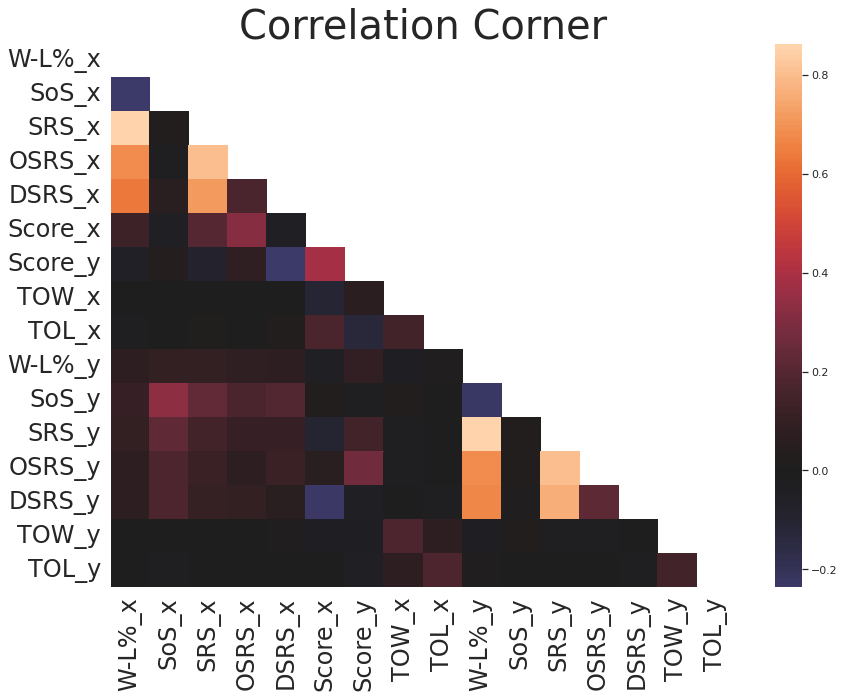

In [ ]:
corr = df.corr()
corr_mask = np.corrcoef(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, mask=mask, center=0)
    plt.title("Correlation Corner", fontsize=40)
    plt.xticks(fontsize=24, rotation=90)
    plt.yticks(fontsize=24, rotation=0)
    plt.show()

In [ ]:
df.columns
df.drop(columns=['PtsW_y', 'PtsL_y'], inplace=True)

In [ ]:
df.rename(columns={'PtsW_x': 'Score_x', 'PtsL_x': 'Score_y'}, inplace=True)

In [ ]:
df.drop(columns=['GP_x', 'GP_y'], inplace=True)

In [ ]:
df.columns

Index(['Tm_x', 'W-L%_x', 'SoS_x', 'SRS_x', 'OSRS_x', 'DSRS_x', 'Week_x',
       'Day_x', 'Date_x', 'Time_x', 'Winner/tie_x', 'Unnamed: 5_x',
       'Loser/tie', 'Unnamed: 7_x', 'Score_x', 'Score_y', 'TOW_x', 'TOL_x',
       'Tm_y', 'W-L%_y', 'SoS_y', 'SRS_y', 'OSRS_y', 'DSRS_y', 'Week_y',
       'Day_y', 'Date_y', 'Time_y', 'Winner/tie_y', 'Unnamed: 5_y',
       'Unnamed: 7_y', 'TOW_y', 'TOL_y'],
      dtype='object')

In [ ]:
final_df = df[['W-L%_x', 'SoS_x', 'OSRS_x', 'DSRS_x','Score_x', 'W-L%_y', 'SoS_y', 'OSRS_y', 'DSRS_y', 'Score_y']]

In [ ]:
final_df.shape

(108686, 10)

In [ ]:
final_df.drop_duplicates(inplace=True)

In [ ]:
len(final_df)/2

5991.5

In [ ]:
split1 = final_df[0:5992]
split2 = final_df[5992:]

In [ ]:
split2.head()

,W-L%_x,SoS_x,OSRS_x,DSRS_x,Score_x,W-L%_y,SoS_y,OSRS_y,DSRS_y,Score_y
858,0.250,-0.4,-2.6,-3.8,16.0,0.406,0.6,-0.4,-0.2,13.0
867,0.563,0.6,1.0,0.3,34.0,0.250,0.8,-0.1,-5.0,16.0
879,0.563,-0.9,0.1,2.8,23.0,0.250,0.8,-0.1,-5.0,22.0
891,0.688,0.7,4.4,1.0,20.0,0.250,0.8,-0.1,-5.0,9.0
903,0.500,0.2,-0.3,1.9,24.0,0.250,0.8,-0.1,-5.0,21.0


In [ ]:
type(split2)

pandas.core.frame.DataFrame

In [ ]:
split2 = split2[['W-L%_y', 'SoS_y','OSRS_y', 'DSRS_y', 'Score_y','W-L%_x', 'SoS_x', 'OSRS_x', 'DSRS_x', 'Score_x']]

In [ ]:
split2 = split2.rename(columns={'W-L%_y': 'W-L%_x', 'SoS_y':'SoS_x', 'OSRS_y':'OSRS_x', 'DSRS_y':'DSRS_x', 'Score_y':'Score_x',
                 'W-L%_x':'W-L%_y', 'SoS_x':'SoS_y', 'OSRS_x':'OSRS_y', 'DSRS_x':'DSRS_y', 'Score_x':'Score_y'})

In [ ]:
final_df = pd.concat([split1, split2])
final_df.tail()

,W-L%_x,SoS_x,OSRS_x,DSRS_x,Score_x,W-L%_y,SoS_y,OSRS_y,DSRS_y,Score_y
2453,0.813,-0.7,0.6,2.6,20.0,0.813,0.4,6.7,4.3,37.0
2457,0.813,0.0,5.0,2.3,20.0,0.625,-1.1,2.5,2.9,26.0
2461,0.813,0.0,5.0,2.3,9.0,0.438,1.1,0.3,-0.4,26.0
2465,0.813,0.0,5.0,2.3,46.0,0.813,0.4,6.7,4.3,48.0
2469,0.813,0.0,5.0,2.3,9.0,0.563,2.0,2.2,1.7,27.0


Text(0, 0.5, 'Frequency Count')

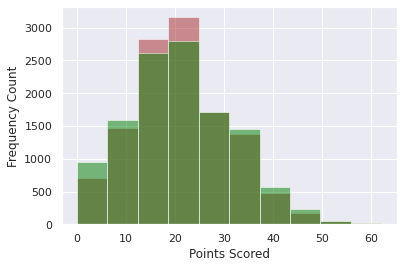

In [ ]:
plt.hist(final_df['Score_x'], alpha=.5, color='brown')
plt.hist(final_df['Score_y'], alpha=.5, color='green')
plt.xlabel('Points Scored')
plt.ylabel('Frequency Count')

In [ ]:
X = final_df.drop(columns=['Score_x', 'Score_y']).to_numpy()
y = final_df[['Score_x', 'Score_y']].to_numpy()

In [ ]:
y

array([[16., 14.],
       [17., 14.],
       [20., 17.],
       ...,
       [ 9., 26.],
       [46., 48.],
       [ 9., 27.]])

In [ ]:
X

array([[ 0.846, -5.8  ,  0.9  , ..., -1.   ,  0.5  , -1.2  ],
       [ 0.571, -3.5  ,  1.2  , ..., -1.   ,  0.5  , -1.2  ],
       [ 0.667,  0.5  ,  2.3  , ..., -1.   ,  0.5  , -1.2  ],
       ...,
       [ 0.813,  0.   ,  5.   , ...,  1.1  ,  0.3  , -0.4  ],
       [ 0.813,  0.   ,  5.   , ...,  0.4  ,  6.7  ,  4.3  ],
       [ 0.813,  0.   ,  5.   , ...,  2.   ,  2.2  ,  1.7  ]])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled[0]

array([ 1.7432125 , -3.60493878,  0.20428953, -0.18822001, -0.27143132,
       -0.62374703,  0.07078407, -0.33753653])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8)

In [ ]:
rdg = MultiOutputRegressor(Ridge(random_state=123)).fit(X_scaled, y)

In [ ]:
rdg_scores = cross_val_score(rdg, X_test, y_test, cv=5, scoring='r2')
rdg_scores.mean()

0.265167750844059

In [ ]:
mean_squared_error(y_test, rdg.predict(X_test))

77.97977401211082

In [ ]:
print(rdg.score(X_train, y_train))
print(rdg.score(X_test, y_test))

0.2655794125116169
0.2710258650307145


In [ ]:
rdg_param_grid = {'estimator__alpha':[1,5,10,15]}

rdgr = Ridge()
gs_rdg = GridSearchCV(MultiOutputRegressor(rdgr), param_grid=rdg_param_grid)

gs_rdg.fit(X_train,y_train)
print(gs_rdg.best_params_)
print(gs_rdg.best_score_)

{'estimator__alpha': 15}
0.26364149040744855


In [ ]:
best_rdg = MultiOutputRegressor(Ridge(alpha=15)).fit(X_train,y_train)

In [ ]:
print('R2 of Ridge on Training Data: ' + str(best_rdg.score(X_train, y_train)))
print('R2 of Ridge on Testing Data: ' + str(best_rdg.score(X_test, y_test)))

R2 of Ridge on Training Data: 0.2657253845379616
R2 of Ridge on Testing Data: 0.2696881318826906


In [ ]:
gb_param_grid = {'estimator__learning_rate':[.1, .5],
              'estimator__min_samples_split':[40,60],
              'estimator__min_samples_leaf':[80,100]}

gb = GradientBoostingRegressor()
gs_gb = GridSearchCV(MultiOutputRegressor(gb), param_grid=gb_param_grid)

gs_gb.fit(X_train,y_train)
print(gs_gb.best_params_)
print(gs_gb.best_score_)

{'estimator__learning_rate': 0.5, 'estimator__min_samples_leaf': 80, 'estimator__min_samples_split': 40}
0.2864393951864333


In [ ]:
best_gb = MultiOutputRegressor(GradientBoostingRegressor(learning_rate=.1, min_samples_leaf=80, min_samples_split=60)).fit(X_train, y_train)

In [ ]:
print('R2 of Gradient Booster on Training Data: ' + str(best_gb.score(X_train, y_train)))
print('R2 of Gradient Booster on Testing Data: ' + str(best_gb.score(X_test, y_test)))

R2 of Gradient Booster on Training Data: 0.323161806654371
R2 of Gradient Booster on Testing Data: 0.28802459011160847


In [ ]:
sv_param_grid = {'estimator__C':[1,5],
              'estimator__gamma':[.1, .5],
              'estimator__epsilon':[.05,.01]}

svr = SVR()
gs_svr = GridSearchCV(MultiOutputRegressor(svr), param_grid=sv_param_grid)

gs_svr.fit(X_train,y_train)
print(gs_svr.best_params_)
print(gs_svr.best_score_)

{'estimator__C': 5, 'estimator__epsilon': 0.05, 'estimator__gamma': 0.1}
0.2624732646549811


In [ ]:
best_sv = MultiOutputRegressor(SVR(C=1, epsilon=.05, gamma=.1)).fit(X_train, y_train)

In [ ]:
print('R2 of Support Vector on Training Data: ' + str(best_sv.score(X_train, y_train)))
print('R2 of Support Vector on Testing Data: ' + str(best_sv.score(X_test, y_test)))

R2 of Support Vector on Training Data: 0.280310875940362
R2 of Support Vector on Testing Data: 0.27047639178801575


In [ ]:
ada_param_grid = {'estimator__learning_rate':[1, .1, .05, .01, .005]}

ada = AdaBoostRegressor()
gs_ada = GridSearchCV(MultiOutputRegressor(ada), param_grid=ada_param_grid)

gs_ada.fit(X_train,y_train)
print(gs_ada.best_params_)
print(gs_ada.best_score_)

{'estimator__learning_rate': 0.1}
0.2413628071687668


In [ ]:
best_ada = MultiOutputRegressor(AdaBoostRegressor(learning_rate=.1)).fit(X_train, y_train)

In [ ]:
print('R2 of ADA Booster on Training Data: ' + str(best_ada.score(X_train, y_train)))
print('R2 of ADA Booster on Testing Data: ' + str(best_ada.score(X_test, y_test)))

R2 of ADA Booster on Training Data: 0.2538122945135957
R2 of ADA Booster on Testing Data: 0.2445582552839602


In [ ]:
print('RMSE of Gradient Booster on Testing Data: ' + str(mean_squared_error(y_test, best_gb.predict(X_test), squared=False)))
print('RMSE of ADA Booster on Testing Data: ' + str(mean_squared_error(y_test, best_ada.predict(X_test), squared=False)))
print('RMSE of Support Vector on Testing Data: ' + str(mean_squared_error(y_test, best_sv.predict(X_test), squared=False)))
print('RMSE of Ridge on Testing Data: ' + str(mean_squared_error(y_test, best_rdg.predict(X_test), squared=False)))

RMSE of Gradient Booster on Testing Data: 8.641020050240478
RMSE of ADA Booster on Testing Data: 8.90737456158881
RMSE of Support Vector on Testing Data: 8.750345243059241
RMSE of Ridge on Testing Data: 8.754331309381389


In [ ]:
d = {'Model': ['GBR', 'ADA', 'SVR', 'Ridge'],
     'Test R2':[str(best_gb.score(X_test, y_test)), str(best_ada.score(X_test, y_test)), str(best_sv.score(X_test, y_test)), str(best_rdg.score(X_test, y_test))],
    'Test RMSE':[str(mean_squared_error(y_test, best_gb.predict(X_test), squared=False)), str(mean_squared_error(y_test, best_ada.predict(X_test), squared=False)), str(mean_squared_error(y_test, best_sv.predict(X_test), squared=False)), str(mean_squared_error(y_test, best_rdg.predict(X_test), squared=False))]}
model_comparison = pd.DataFrame(data=d)
model_comparison.set_index('Model')

In [ ]:
model_comparison

,Model,Test R2,Test RMSE
0,GBR,0.3209793395965892,8.501468866128373
1,ADA,0.2586285690599521,8.88708443689956
2,SVR,0.2842588976735315,8.729210335881513
3,Ridge,0.26942508210002253,8.822794942146498


In [ ]:
gb_predictions = best_gb.predict(X_scaled)
ada_predictions = best_ada.predict(X_scaled)
sv_predictions = best_sv.predict(X_scaled)
rdg_predictions = best_rdg.predict(X_scaled)

In [ ]:
actual_x = y[:, 0].reshape(y.shape[0], 1)
actual_y = y[:, 1].reshape(y.shape[0], 1)

In [ ]:
gb_x = gb_predictions[:, 0].reshape(gb_predictions.shape[0], 1)
gb_X = np.append(gb_x, np.ones((gb_predictions.shape[0], 1)), axis=1)
gb_y = gb_predictions[:, 1].reshape(gb_predictions.shape[0], 1)

ada_x = ada_predictions[:, 0].reshape(ada_predictions.shape[0], 1)
ada_X = np.append(ada_x, np.ones((ada_predictions.shape[0], 1)), axis=1)
ada_y = ada_predictions[:, 1].reshape(ada_predictions.shape[0], 1)

sv_x = sv_predictions[:, 0].reshape(sv_predictions.shape[0], 1)
sv_X = np.append(sv_x, np.ones((sv_predictions.shape[0], 1)), axis=1)
sv_y = sv_predictions[:, 1].reshape(sv_predictions.shape[0], 1)

rdg_x = rdg_predictions[:, 0].reshape(rdg_predictions.shape[0], 1)
rdg_X = np.append(rdg_x, np.ones((rdg_predictions.shape[0], 1)), axis=1)
rdg_y = rdg_predictions[:, 1].reshape(rdg_predictions.shape[0], 1)

gb_theta = np.linalg.inv(gb_X.T.dot(gb_X)).dot(gb_X.T).dot(gb_y)
ada_theta = np.linalg.inv(ada_X.T.dot(ada_X)).dot(ada_X.T).dot(ada_y)
sv_theta = np.linalg.inv(sv_X.T.dot(sv_X)).dot(sv_X.T).dot(sv_y)
rdg_theta = np.linalg.inv(rdg_X.T.dot(rdg_X)).dot(rdg_X.T).dot(rdg_y)

print(f'The parameters of the Gradient Booster line: {gb_theta}')
print(f'The parameters of the ADA Booster line: {ada_theta}')
print(f'The parameters of the Support Vector line: {sv_theta}')
print(f'The parameters of the Ridge line: {rdg_theta}')

gb_y_line = gb_X.dot(gb_theta)
ada_y_line = ada_X.dot(ada_theta)
sv_y_line = sv_X.dot(sv_theta)
rdg_y_line = rdg_X.dot(rdg_theta)

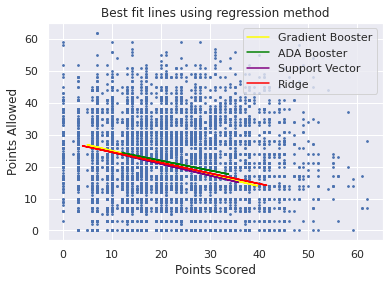

In [ ]:
plt.scatter(actual_x, actual_y, marker='o', s=3)
plt.plot(gb_x, gb_y_line, 'r', color='yellow', label='Gradient Booster')
plt.plot(ada_x, ada_y_line, 'r', color='green', label='ADA Booster')
plt.plot(sv_x, sv_y_line, 'r', color='purple', label='Support Vector')
plt.plot(rdg_x, rdg_y_line, 'r', color='red', label='Ridge')
plt.title('Best fit lines using regression method')
plt.xlabel('Points Scored')
plt.ylabel('Points Allowed')
plt.legend()

plt.show()

In [ ]:
afc2021 = pd.read_html('/content/gdrive/MyDrive/SuperBowl2022/superbowl_data/2021/afc.xls')
nfc2021 = pd.read_html('/content/gdrive/MyDrive/SuperBowl2022/superbowl_data/2021/nfc.xls')

In [ ]:
afc2021 = afc2021[0]
nfc2021 = nfc2021[0]

In [ ]:
afc2021['Tm'] = afc2021['Tm'].str.replace('*', '')
afc2021['Tm'] = afc2021['Tm'].str.replace('+', '')
nfc2021['Tm'] = nfc2021['Tm'].str.replace('*', '')
nfc2021['Tm'] = nfc2021['Tm'].str.replace('+', '')

In [ ]:
bengals = afc2021.loc[afc2021['Tm']=='Cincinnati Bengals']
bengals

,Tm,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
4,Cincinnati Bengals,10,7,0,0.588,460,376,84,4.9,-1.9,3.1,3.4,-0.3


In [ ]:
rams = nfc2021.loc[nfc2021['Tm']=='Los Angeles Rams']
rams

,Tm,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
12,Los Angeles Rams,12,5,0,0.706,460,372,88,5.2,0.1,5.3,4.2,1.1


In [ ]:
final_df.columns

Index(['W-L%_x', 'SoS_x', 'OSRS_x', 'DSRS_x', 'Score_x', 'W-L%_y', 'SoS_y',
       'OSRS_y', 'DSRS_y', 'Score_y'],
      dtype='object')

In [ ]:
superbowldata = {'W-L%_x':.588,'SoS_x':-1.9,'OSRS_x':3.4,'DSRS_x':-0.3,'W-L%_y':.706,'SoS_y':0.1,'OSRS_y':4.2,'DSRS_y':1.1}
superbowl_df = pd.DataFrame(data=superbowldata, index=[2470])
superbowl_df

,W-L%_x,SoS_x,OSRS_x,DSRS_x,W-L%_y,SoS_y,OSRS_y,DSRS_y
2470,0.588,-1.9,3.4,-0.3,0.706,0.1,4.2,1.1


In [ ]:
final_df

,W-L%_x,SoS_x,OSRS_x,DSRS_x,Score_x,W-L%_y,SoS_y,OSRS_y,DSRS_y,Score_y
0,0.846,-5.8,0.9,-0.5,16.0,0.455,-1.0,0.5,-1.2,14.0
6,0.571,-3.5,1.2,-0.6,17.0,0.455,-1.0,0.5,-1.2,14.0
12,0.667,0.5,2.3,-1.3,20.0,0.455,-1.0,0.5,-1.2,17.0
18,0.583,-0.5,-0.1,1.6,26.0,0.455,-1.0,0.5,-1.2,14.0
24,0.429,5.1,-2.4,0.6,22.0,0.455,-1.0,0.5,-1.2,20.0
...,...,...,...,...,...,...,...,...,...,...
2453,0.813,-0.7,0.6,2.6,20.0,0.813,0.4,6.7,4.3,37.0
2457,0.813,0.0,5.0,2.3,20.0,0.625,-1.1,2.5,2.9,26.0
2461,0.813,0.0,5.0,2.3,9.0,0.438,1.1,0.3,-0.4,26.0
2465,0.813,0.0,5.0,2.3,46.0,0.813,0.4,6.7,4.3,48.0


In [ ]:
final_df2 = final_df.append(superbowl_df)

In [ ]:
final_df2

,W-L%_x,SoS_x,OSRS_x,DSRS_x,Score_x,W-L%_y,SoS_y,OSRS_y,DSRS_y,Score_y
0,0.846,-5.8,0.9,-0.5,16.0,0.455,-1.0,0.5,-1.2,14.0
6,0.571,-3.5,1.2,-0.6,17.0,0.455,-1.0,0.5,-1.2,14.0
12,0.667,0.5,2.3,-1.3,20.0,0.455,-1.0,0.5,-1.2,17.0
18,0.583,-0.5,-0.1,1.6,26.0,0.455,-1.0,0.5,-1.2,14.0
24,0.429,5.1,-2.4,0.6,22.0,0.455,-1.0,0.5,-1.2,20.0
...,...,...,...,...,...,...,...,...,...,...
2457,0.813,0.0,5.0,2.3,20.0,0.625,-1.1,2.5,2.9,26.0
2461,0.813,0.0,5.0,2.3,9.0,0.438,1.1,0.3,-0.4,26.0
2465,0.813,0.0,5.0,2.3,46.0,0.813,0.4,6.7,4.3,48.0
2469,0.813,0.0,5.0,2.3,9.0,0.563,2.0,2.2,1.7,27.0


In [ ]:
X2 = final_df2.drop(columns=['Score_x', 'Score_y']).to_numpy()

In [ ]:
X2_scaled = scaler.fit_transform(X2)

In [ ]:
best_gb.predict([X2_scaled[11983]])

array([[25.59813302, 21.84201528]])

Final Prediction: Bengals 26, Rams 22